In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Data prep

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('c_nc_dataset_breast_upd.dat', sep=' ')
batch = df.pop('Batch')
df

,1,10,100,1000,10000,100009676,10001,10002,10003,100037417,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
GSM124994.CEL.gz,5.169555,5.656573,5.519325,5.170612,7.689052,4.696899,6.569954,4.896594,4.219130,8.103681,...,10.100350,8.087323,9.345297,11.262641,8.513745,11.407790,4.694036,8.994655,6.462858,7.513527
GSM124995.CEL.gz,5.317440,4.720840,6.348618,7.481577,8.711150,5.292121,6.312253,4.700275,4.376932,7.478336,...,10.923245,8.321477,9.063083,10.790718,8.295518,11.092981,5.328968,8.424992,7.443503,7.974708
GSM124996.CEL.gz,5.255465,4.817531,5.865592,5.819722,7.650419,4.926786,7.222562,4.627080,4.574828,7.989654,...,10.346408,7.377500,8.766322,10.760286,8.424525,10.334164,6.070927,8.541629,7.202971,7.975083
GSM124997.CEL.gz,5.871255,4.673238,6.244621,5.420261,8.076629,5.233536,6.744233,4.701931,4.519062,8.850820,...,10.511712,7.939216,9.169144,9.198777,7.854467,10.966430,5.069728,8.896313,6.479068,7.619055
GSM124998.CEL.gz,5.210590,5.271147,6.723927,8.145837,10.695302,4.928815,6.211725,4.717018,4.459874,7.969122,...,10.988700,7.121776,7.928104,11.401303,8.326572,10.693213,5.435835,8.548361,6.809689,7.934336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1615662_0713_RC_12_86_nu_id1_t2_t.CEL.gz,6.930230,5.022602,5.755679,5.124531,6.088491,5.366054,6.617587,5.193313,5.184831,9.029477,...,9.653969,8.123838,8.126834,11.487498,6.907289,10.968527,4.805572,7.723434,5.780416,7.997407
GSM1615663_0713_RC_12_87_nu_id7_t1_t.CEL.gz,6.128546,4.493658,5.610844,7.266049,7.698115,4.084926,6.466776,4.800410,4.345984,7.875869,...,10.478638,8.807999,8.894918,11.589775,7.887923,10.923651,4.925971,8.911589,5.934525,7.239717
GSM1615664_0713_RC_12_88_nu_id7_t2_t.CEL.gz,6.952048,4.742039,5.366870,5.499350,5.387182,4.861303,6.280749,4.575980,3.464619,9.045555,...,9.577548,8.209210,8.582046,10.941709,7.191817,11.006971,5.141914,7.823700,6.152700,8.374306
GSM1615665_0713_RC_12_89_nu_id24_t1_t.CEL.gz,6.414377,4.845415,5.765183,6.269495,7.009673,5.129497,5.540588,4.742080,3.631000,7.742141,...,10.018975,7.902103,8.672681,12.402232,8.571934,11.156208,4.585537,9.739740,6.368703,7.667518


In [4]:
label_arr = []

# 5460 labels
label_arr += [1] * 127

# 10780 labels
with open('10780_txt.txt', 'r') as f:
    for line in f:
        if 'IDC' in line:
            label_arr.append(1)
        else:
            label_arr.append(0)

# 26457 labels
label_arr += [0] * 113

# 29431 labels
label_arr += [0] * 12 + [1] * 54

# 42568 labels
label_arr += [0] * 17 + [1] * 104

# 66162 labels
label_arr += [0] * 78

label_arr = np.array(label_arr)

In [5]:
corr = df.corr().abs()
corr

,1,10,100,1000,10000,100009676,10001,10002,10003,100037417,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
1,1.000000,0.058665,0.057274,0.137222,0.105989,0.108831,0.123077,0.154622,0.178257,0.240315,...,0.209353,0.139137,0.004219,0.025984,0.342959,0.078911,0.017829,0.134024,0.359827,0.209222
10,0.058665,1.000000,0.114467,0.008263,0.144674,0.098230,0.055953,0.000631,0.049656,0.036177,...,0.054315,0.062405,0.070768,0.093335,0.040131,0.068990,0.068664,0.024238,0.002574,0.094002
100,0.057274,0.114467,1.000000,0.068720,0.023890,0.182853,0.003527,0.008144,0.051511,0.247820,...,0.209714,0.236500,0.039622,0.436564,0.134588,0.282094,0.146142,0.202284,0.035224,0.332158
1000,0.137222,0.008263,0.068720,1.000000,0.052010,0.074650,0.016222,0.011691,0.152497,0.039753,...,0.068735,0.053678,0.062353,0.224349,0.087947,0.148235,0.064335,0.134544,0.002184,0.065090
10000,0.105989,0.144674,0.023890,0.052010,1.000000,0.108678,0.149181,0.011779,0.323779,0.202712,...,0.295257,0.184625,0.098837,0.269521,0.253054,0.061040,0.018409,0.048255,0.029095,0.281142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0.078911,0.068990,0.282094,0.148235,0.061040,0.118418,0.008530,0.060040,0.257666,0.144473,...,0.072052,0.131786,0.136912,0.432982,0.106047,1.000000,0.220011,0.194593,0.132984,0.093761
9992,0.017829,0.068664,0.146142,0.064335,0.018409,0.139963,0.115372,0.177055,0.020704,0.096902,...,0.012193,0.181598,0.174000,0.278839,0.093201,0.220011,1.000000,0.091533,0.179796,0.034051
9993,0.134024,0.024238,0.202284,0.134544,0.048255,0.063805,0.218415,0.003958,0.182195,0.024597,...,0.078813,0.004160,0.064530,0.308094,0.032408,0.194593,0.091533,1.000000,0.166920,0.002537
9994,0.359827,0.002574,0.035224,0.002184,0.029095,0.054303,0.309852,0.346768,0.148030,0.219649,...,0.092969,0.276938,0.118082,0.146642,0.000967,0.132984,0.179796,0.166920,1.000000,0.297333


In [6]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
upper

,1,10,100,1000,10000,100009676,10001,10002,10003,100037417,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
1,NaN,0.058665,0.057274,0.137222,0.105989,0.108831,0.123077,0.154622,0.178257,0.240315,...,0.209353,0.139137,0.004219,0.025984,0.342959,0.078911,0.017829,0.134024,0.359827,0.209222
10,NaN,NaN,0.114467,0.008263,0.144674,0.098230,0.055953,0.000631,0.049656,0.036177,...,0.054315,0.062405,0.070768,0.093335,0.040131,0.068990,0.068664,0.024238,0.002574,0.094002
100,NaN,NaN,NaN,0.068720,0.023890,0.182853,0.003527,0.008144,0.051511,0.247820,...,0.209714,0.236500,0.039622,0.436564,0.134588,0.282094,0.146142,0.202284,0.035224,0.332158
1000,NaN,NaN,NaN,NaN,0.052010,0.074650,0.016222,0.011691,0.152497,0.039753,...,0.068735,0.053678,0.062353,0.224349,0.087947,0.148235,0.064335,0.134544,0.002184,0.065090
10000,NaN,NaN,NaN,NaN,NaN,0.108678,0.149181,0.011779,0.323779,0.202712,...,0.295257,0.184625,0.098837,0.269521,0.253054,0.061040,0.018409,0.048255,0.029095,0.281142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.220011,0.194593,0.132984,0.093761
9992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.091533,0.179796,0.034051
9993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.166920,0.002537
9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.297333


In [7]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
len(to_drop)

141

In [8]:
df.drop(to_drop, axis=1, inplace=True)
df

,1,10,100,1000,10000,100009676,10001,10002,10003,100037417,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
GSM124994.CEL.gz,5.169555,5.656573,5.519325,5.170612,7.689052,4.696899,6.569954,4.896594,4.219130,8.103681,...,10.100350,8.087323,9.345297,11.262641,8.513745,11.407790,4.694036,8.994655,6.462858,7.513527
GSM124995.CEL.gz,5.317440,4.720840,6.348618,7.481577,8.711150,5.292121,6.312253,4.700275,4.376932,7.478336,...,10.923245,8.321477,9.063083,10.790718,8.295518,11.092981,5.328968,8.424992,7.443503,7.974708
GSM124996.CEL.gz,5.255465,4.817531,5.865592,5.819722,7.650419,4.926786,7.222562,4.627080,4.574828,7.989654,...,10.346408,7.377500,8.766322,10.760286,8.424525,10.334164,6.070927,8.541629,7.202971,7.975083
GSM124997.CEL.gz,5.871255,4.673238,6.244621,5.420261,8.076629,5.233536,6.744233,4.701931,4.519062,8.850820,...,10.511712,7.939216,9.169144,9.198777,7.854467,10.966430,5.069728,8.896313,6.479068,7.619055
GSM124998.CEL.gz,5.210590,5.271147,6.723927,8.145837,10.695302,4.928815,6.211725,4.717018,4.459874,7.969122,...,10.988700,7.121776,7.928104,11.401303,8.326572,10.693213,5.435835,8.548361,6.809689,7.934336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1615662_0713_RC_12_86_nu_id1_t2_t.CEL.gz,6.930230,5.022602,5.755679,5.124531,6.088491,5.366054,6.617587,5.193313,5.184831,9.029477,...,9.653969,8.123838,8.126834,11.487498,6.907289,10.968527,4.805572,7.723434,5.780416,7.997407
GSM1615663_0713_RC_12_87_nu_id7_t1_t.CEL.gz,6.128546,4.493658,5.610844,7.266049,7.698115,4.084926,6.466776,4.800410,4.345984,7.875869,...,10.478638,8.807999,8.894918,11.589775,7.887923,10.923651,4.925971,8.911589,5.934525,7.239717
GSM1615664_0713_RC_12_88_nu_id7_t2_t.CEL.gz,6.952048,4.742039,5.366870,5.499350,5.387182,4.861303,6.280749,4.575980,3.464619,9.045555,...,9.577548,8.209210,8.582046,10.941709,7.191817,11.006971,5.141914,7.823700,6.152700,8.374306
GSM1615665_0713_RC_12_89_nu_id24_t1_t.CEL.gz,6.414377,4.845415,5.765183,6.269495,7.009673,5.129497,5.540588,4.742080,3.631000,7.742141,...,10.018975,7.902103,8.672681,12.402232,8.571934,11.156208,4.585537,9.739740,6.368703,7.667518


In [9]:
rfe_pre = RFE(estimator=RandomForestClassifier(), n_features_to_select=300, step=.01, verbose=1)
selector_pre = rfe_pre.fit(df, label_arr)

Fitting estimator with 19215 features.
Fitting estimator with 19023 features.
Fitting estimator with 18831 features.
Fitting estimator with 18639 features.
Fitting estimator with 18447 features.
Fitting estimator with 18255 features.
Fitting estimator with 18063 features.
Fitting estimator with 17871 features.
Fitting estimator with 17679 features.
Fitting estimator with 17487 features.
Fitting estimator with 17295 features.
Fitting estimator with 17103 features.
Fitting estimator with 16911 features.
Fitting estimator with 16719 features.
Fitting estimator with 16527 features.
Fitting estimator with 16335 features.
Fitting estimator with 16143 features.
Fitting estimator with 15951 features.
Fitting estimator with 15759 features.
Fitting estimator with 15567 features.
Fitting estimator with 15375 features.
Fitting estimator with 15183 features.
Fitting estimator with 14991 features.
Fitting estimator with 14799 features.
Fitting estimator with 14607 features.
Fitting estimator with 14

In [10]:
filtered_df_pre = df.loc[:, selector_pre.support_]

In [11]:
rfe50 = RFE(estimator=RandomForestClassifier(), n_features_to_select=50)
selector50 = rfe50.fit(filtered_df_pre, label_arr)

In [12]:
filtered_df_50 = filtered_df_pre.loc[:, selector50.support_]
filtered_df_50_arr = np.array(filtered_df_50)

In [13]:
rfe20 = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)
selector20 = rfe20.fit(filtered_df_50, label_arr)

In [14]:
filtered_df_20 = filtered_df_50.loc[:, selector20.support_]
filtered_df_20_arr = np.array(filtered_df_20)

# Simple classifiers

In [15]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## Decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=max_depth))
    cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())
    decision_tree_acc.append(np.mean(cv))
decision_tree_acc

[0.7420289855072463,
 0.7898550724637682,
 0.7942028985507246,
 0.7884057971014493,
 0.7898550724637682,
 0.7826086956521738,
 0.8014492753623189,
 0.7869565217391304,
 0.7869565217391303,
 0.7913043478260869,
 0.7826086956521741,
 0.7811594202898551,
 0.7942028985507246,
 0.7855072463768116,
 0.7869565217391304,
 0.7913043478260869,
 0.7927536231884058,
 0.7826086956521741]

In [17]:
decision_tree_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=max_depth))
    cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())
    decision_tree_acc.append(np.mean(cv))
decision_tree_acc

[0.7086956521739131,
 0.744927536231884,
 0.7666666666666666,
 0.755072463768116,
 0.7768115942028986,
 0.756521739130435,
 0.7681159420289855,
 0.7768115942028986,
 0.7666666666666667,
 0.7565217391304347,
 0.7971014492753624,
 0.7637681159420289,
 0.7840579710144928,
 0.772463768115942,
 0.7855072463768116,
 0.7956521739130435,
 0.7768115942028985,
 0.7768115942028986]

## Random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

random_forest_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=max_depth))
    cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())
    random_forest_acc.append(np.mean(cv))
random_forest_acc

[0.8318840579710145,
 0.8753623188405797,
 0.8840579710144928,
 0.9057971014492754,
 0.9101449275362319,
 0.9014492753623188,
 0.9043478260869564,
 0.898550724637681,
 0.9014492753623189,
 0.8942028985507247,
 0.9,
 0.9101449275362319,
 0.9072463768115941,
 0.9,
 0.8942028985507247,
 0.9144927536231885,
 0.9072463768115944,
 0.898550724637681]

In [19]:
random_forest_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=max_depth))
    cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())
    random_forest_acc.append(np.mean(cv))
random_forest_acc

[0.8347826086956521,
 0.8652173913043478,
 0.8985507246376813,
 0.9028985507246376,
 0.9072463768115941,
 0.9043478260869566,
 0.9072463768115941,
 0.9028985507246376,
 0.9115942028985508,
 0.9028985507246376,
 0.9115942028985508,
 0.9043478260869564,
 0.9072463768115941,
 0.9101449275362319,
 0.9072463768115941,
 0.9086956521739129,
 0.9,
 0.9101449275362319]

## SVC

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
params = [{'svc__C':[10**x for x in range(-2, 10)], 'svc__gamma':[10**x for x in range(-5, 4)]}]
clf = GridSearchCV(pipeline, params)
clf.fit(filtered_df_20_arr, label_arr)
clf.best_params_

{'svc__C': 1, 'svc__gamma': 0.1}

In [21]:
clf = make_pipeline(StandardScaler(), SVC(C=clf.best_params_['svc__C'], gamma=clf.best_params_['svc__gamma']))
cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())
np.mean(cv)

0.8768115942028987

In [22]:
pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
params = [{'svc__C':[10**x for x in range(-2, 10)], 'svc__gamma':[10**x for x in range(-5, 4)]}]
clf = GridSearchCV(pipeline, params)
clf.fit(filtered_df_50_arr, label_arr)
clf.best_params_

{'svc__C': 100, 'svc__gamma': 0.01}

In [23]:
clf = make_pipeline(StandardScaler(), SVC(C=clf.best_params_['svc__C'], gamma=clf.best_params_['svc__gamma']))
cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())
np.mean(cv)

0.9043478260869564

## XGBoost

In [24]:
import xgboost as xgb

xgb_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', max_depth=max_depth))
    params={'objective':'binary:logistic'}
    cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())
    xgb_acc.append(np.mean(cv))
xgb_acc

[0.9217391304347826,
 0.9159420289855073,
 0.9072463768115941,
 0.9144927536231885,
 0.9159420289855073,
 0.9072463768115941,
 0.9072463768115941,
 0.9086956521739129,
 0.9086956521739129,
 0.9086956521739129,
 0.9086956521739129,
 0.9086956521739129,
 0.9086956521739129,
 0.9086956521739129,
 0.9086956521739129,
 0.9086956521739129,
 0.9086956521739129,
 0.9086956521739129]

In [25]:
xgb_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', max_depth=max_depth))
    params={'objective':'binary:logistic'}
    cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())
    xgb_acc.append(np.mean(cv))
xgb_acc

[0.928985507246377,
 0.9289855072463767,
 0.9159420289855073,
 0.9057971014492754,
 0.9144927536231883,
 0.9159420289855073,
 0.9144927536231885,
 0.9202898550724639,
 0.9231884057971016,
 0.9231884057971016,
 0.9231884057971016,
 0.9231884057971016,
 0.9231884057971016,
 0.9231884057971016,
 0.9231884057971016,
 0.9231884057971016,
 0.9231884057971016,
 0.9231884057971016]

## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_acc = []
for neighbors in range(1, 20):
    clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=neighbors))
    cv = cross_val_score(clf, filtered_df_20, label_arr, cv=StratifiedKFold())
    knn_acc.append(np.mean(cv))
knn_acc

[0.8840579710144928,
 0.8739130434782609,
 0.8956521739130435,
 0.882608695652174,
 0.8782608695652174,
 0.8739130434782609,
 0.8695652173913043,
 0.8637681159420291,
 0.8681159420289856,
 0.8637681159420291,
 0.8652173913043478,
 0.8637681159420291,
 0.8608695652173914,
 0.8579710144927537,
 0.8521739130434783,
 0.8536231884057971,
 0.8434782608695652,
 0.846376811594203,
 0.8420289855072465]

In [27]:
knn_acc = []
for neighbors in range(1, 20):
    clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=neighbors))
    cv = cross_val_score(clf, filtered_df_50, label_arr, cv=StratifiedKFold())
    knn_acc.append(np.mean(cv))
knn_acc

[0.9057971014492754,
 0.8913043478260869,
 0.9028985507246376,
 0.8971014492753623,
 0.8942028985507247,
 0.8898550724637679,
 0.8942028985507247,
 0.8884057971014492,
 0.8942028985507247,
 0.8913043478260869,
 0.8869565217391304,
 0.8869565217391304,
 0.8884057971014494,
 0.8826086956521738,
 0.8797101449275363,
 0.8695652173913044,
 0.8753623188405797,
 0.863768115942029,
 0.8724637681159422]

# MLP improved

### 20 features

In [32]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=20))
    for i in range(hp.Int('layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=8, max_value=128, step=4)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(hp.Choice('drop_' + str(i), values=[.0, .1, .2, .3])))
    model.add(Dense(1))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    learning_rate=hp.Choice('learning_rate', values=[.01, .001, .0001])
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

In [33]:
import keras_tuner as kt
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from keras.utils import to_categorical
from keras.optimizers import Adam

X_train, X_test, y_train, y_test = train_test_split(filtered_df_20_arr, label_arr, test_size=.2)
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=20, factor=3, directory='kt_test20', overwrite=False)
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=50, validation_split=.2, callbacks=[stop_early])

Using TensorFlow backend
Reloading Tuner from kt_test20/untitled_project/tuner0.json


In [34]:
best_hps = tuner.get_best_hyperparameters(num_trials=3)[0]
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 104)               2184      
                                                                 
 batch_normalization (BatchN  (None, 104)              416       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 104)               0         
                                                                 
 dropout_20 (Dropout)        (None, 104)               0         
                                                                 
 dense_31 (Dense)            (None, 84)                8820      
                                                                 
 batch_normalization_1 (Batc  (None, 84)               336       
 hNormalization)                                     

In [35]:
history = model.fit(X_train, y_train, epochs=50, validation_split=.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print(best_epoch)

Epoch 1/50
14/14 [==============================] - 1s 37ms/step - loss: 0.5794 - accuracy: 0.7234 - val_loss: 0.4085 - val_accuracy: 0.8649
Epoch 2/50
14/14 [==============================] - 0s 25ms/step - loss: 0.4039 - accuracy: 0.9048 - val_loss: 0.4734 - val_accuracy: 0.8288
Epoch 3/50
14/14 [==============================] - 0s 26ms/step - loss: 0.3628 - accuracy: 0.9138 - val_loss: 0.4422 - val_accuracy: 0.8378
Epoch 4/50
14/14 [==============================] - 0s 26ms/step - loss: 0.3178 - accuracy: 0.9433 - val_loss: 0.4231 - val_accuracy: 0.8198
Epoch 5/50
14/14 [==============================] - 0s 25ms/step - loss: 0.2935 - accuracy: 0.9456 - val_loss: 0.5275 - val_accuracy: 0.7658
Epoch 6/50
14/14 [==============================] - 0s 26ms/step - loss: 0.2469 - accuracy: 0.9728 - val_loss: 0.4105 - val_accuracy: 0.8739
Epoch 7/50
14/14 [==============================] - 0s 25ms/step - loss: 0.2344 - accuracy: 0.9683 - val_loss: 0.3595 - val_accuracy: 0.9099
Epoch 8/50
14

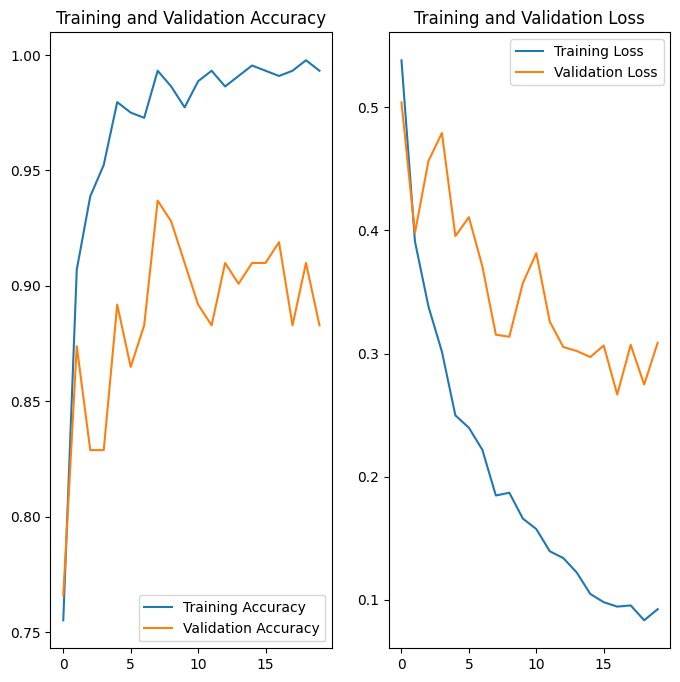

In [36]:
best_epoch = 20 if best_epoch < 20 else best_epoch

hypermodel = tuner.hypermodel.build(best_hps)
history = hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=.2, verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(best_epoch)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

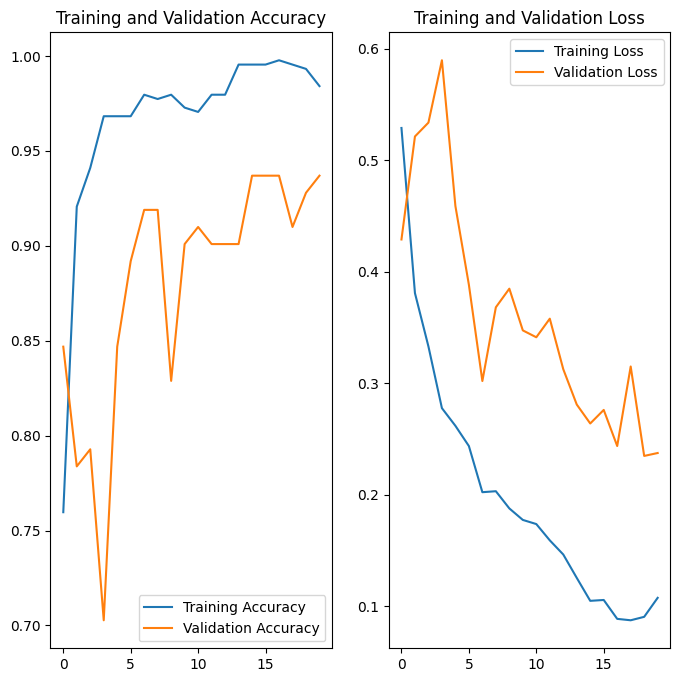

In [37]:
hypermodel = tuner.hypermodel.build(best_hps)
history = hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=.2, verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(best_epoch)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
hypermodel.evaluate(X_test, y_test)

5/5 [==============================] - 0s 9ms/step - loss: 0.2202 - accuracy: 0.9348


[0.2201894223690033, 0.9347826242446899]

In [40]:
from sklearn.model_selection import KFold

nn_acc=[]
for train, test in KFold(shuffle=True).split(filtered_df_20_arr, label_arr):
    X_train = filtered_df_20_arr[train]
    X_test = filtered_df_20_arr[test]
    y_train = label_arr[train]
    y_test = label_arr[test]
    hypermodel = tuner.hypermodel.build(best_hps)
    hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=.2, verbose=0)
    nn_acc.append(hypermodel.evaluate(X_test, y_test)[1])
print(np.mean(nn_acc))

5/5 [==============================] - 0s 14ms/step - loss: 0.5667 - accuracy: 0.6884


KeyboardInterrupt: 

In [41]:
from sklearn.model_selection import KFold

for rep in range(4):
    print('Training data repeats: ', rep)
    nn_acc=[]
    for train, test in KFold(shuffle=True).split(filtered_df_20_arr, label_arr):
        train_rep = np.array(train)
        for i in range(rep):
            train_rep = np.append(train_rep, train)
        ss = StandardScaler()
        rX_train = filtered_df_20_arr[train_rep]
        rX_test = filtered_df_20_arr[test]
        ss.fit(rX_train)
        rX_train = ss.transform(rX_train)
        rX_test = ss.transform(rX_test)
        ry_train = label_arr[train_rep]
        ry_test = label_arr[test]
        hypermodel = tuner.hypermodel.build(best_hps)
        hypermodel.fit(rX_train, ry_train, epochs=best_epoch, validation_split=.2, verbose=0)
        nn_acc.append(hypermodel.evaluate(rX_test, ry_test)[1])
    print(np.mean(nn_acc))

Training data repeats:  0
5/5 [==============================] - 0s 8ms/step - loss: 0.2112 - accuracy: 0.9275
0.9086956739425659
Training data repeats:  1
5/5 [==============================] - 0s 8ms/step - loss: 0.1580 - accuracy: 0.9420
0.9333333492279052
Training data repeats:  2
5/5 [==============================] - 0s 9ms/step - loss: 0.0901 - accuracy: 0.9783
0.939130449295044
Training data repeats:  3
5/5 [==============================] - 0s 8ms/step - loss: 0.1772 - accuracy: 0.9203
0.9347826242446899


In [42]:
import keras.backend as K
print(hypermodel.layers[3].rate, hypermodel.layers[7].rate, K.eval(hypermodel.optimizer.lr))

0.0 0.0 0.01


### 50 features

In [43]:
def build_model50(hp):
    model = Sequential()
    model.add(Input(shape=50))
    for i in range(hp.Int('layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=8, max_value=128, step=4)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(hp.Choice('drop_' + str(i), values=[.0, .1, .2, .3])))
    model.add(Dense(1))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    learning_rate=hp.Choice('learning_rate', values=[.01, .001, .0001])
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

In [44]:
X_train, X_test, y_train, y_test = train_test_split(filtered_df_50_arr, label_arr, test_size=.2)
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
tuner = kt.Hyperband(build_model50, objective='val_accuracy', max_epochs=20, factor=3, directory='kt_test50', overwrite=False)
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=50, validation_split=.2, callbacks=[stop_early])

Reloading Tuner from kt_test50/untitled_project/tuner0.json


In [45]:
best_hps = tuner.get_best_hyperparameters(num_trials=3)[0]
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 48)                2448      
                                                                 
 batch_normalization_75 (Bat  (None, 48)               192       
 chNormalization)                                                
                                                                 
 activation_75 (Activation)  (None, 48)                0         
                                                                 
 dropout_70 (Dropout)        (None, 48)                0         
                                                                 
 dense_106 (Dense)           (None, 92)                4508      
                                                                 
 batch_normalization_76 (Bat  (None, 92)               368       
 chNormalization)                                    

In [46]:
history = model.fit(X_train, y_train, epochs=50, validation_split=.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print(best_epoch)

Epoch 1/50
14/14 [==============================] - 1s 35ms/step - loss: 0.6073 - accuracy: 0.7234 - val_loss: 0.4419 - val_accuracy: 0.7928
Epoch 2/50
14/14 [==============================] - 0s 25ms/step - loss: 0.4659 - accuracy: 0.8435 - val_loss: 0.3787 - val_accuracy: 0.8739
Epoch 3/50
14/14 [==============================] - 0s 24ms/step - loss: 0.4029 - accuracy: 0.8912 - val_loss: 0.3987 - val_accuracy: 0.8919
Epoch 4/50
14/14 [==============================] - 0s 27ms/step - loss: 0.3492 - accuracy: 0.9206 - val_loss: 0.4114 - val_accuracy: 0.8559
Epoch 5/50
14/14 [==============================] - 0s 26ms/step - loss: 0.3112 - accuracy: 0.9410 - val_loss: 0.4191 - val_accuracy: 0.8829
Epoch 6/50
14/14 [==============================] - 0s 25ms/step - loss: 0.2926 - accuracy: 0.9342 - val_loss: 0.3787 - val_accuracy: 0.8829
Epoch 7/50
14/14 [==============================] - 0s 24ms/step - loss: 0.2635 - accuracy: 0.9297 - val_loss: 0.3999 - val_accuracy: 0.8559
Epoch 8/50
14

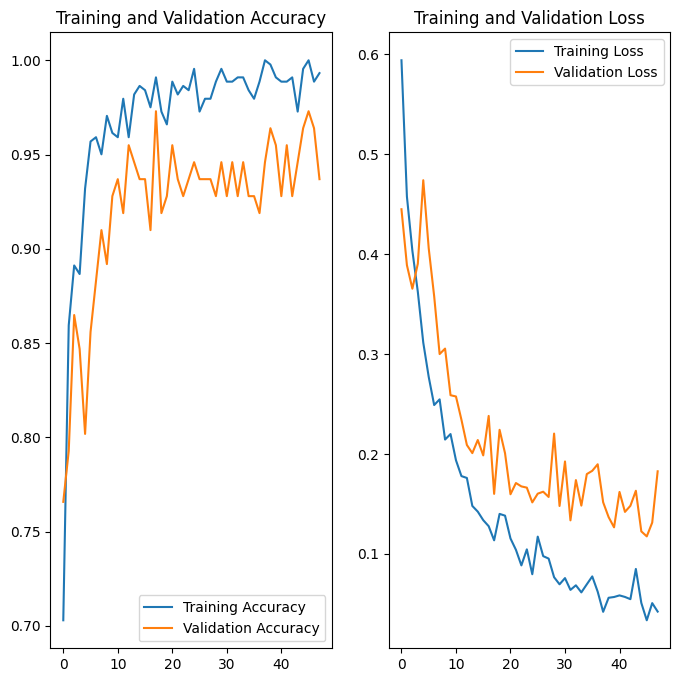

In [47]:
best_epoch = 20 if best_epoch < 20 else best_epoch

hypermodel = tuner.hypermodel.build(best_hps)
history = hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=.2, verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(best_epoch)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [48]:
for rep in range(4):
    print('Training data repeats: ', rep)
    nn_acc=[]
    for train, test in KFold(shuffle=True).split(filtered_df_50_arr, label_arr):
        train_rep = np.array(train)
        for i in range(rep):
            train_rep = np.append(train_rep, train)
        ss = StandardScaler()
        rX_train = filtered_df_50_arr[train_rep]
        rX_test = filtered_df_50_arr[test]
        ss.fit(rX_train)
        rX_train = ss.transform(rX_train)
        rX_test = ss.transform(rX_test)
        ry_train = label_arr[train_rep]
        ry_test = label_arr[test]
        hypermodel = tuner.hypermodel.build(best_hps)
        hypermodel.fit(rX_train, ry_train, epochs=best_epoch, validation_split=.2, verbose=0)
        nn_acc.append(hypermodel.evaluate(rX_test, ry_test)[1])
    print(np.mean(nn_acc))

Training data repeats:  0
5/5 [==============================] - 0s 7ms/step - loss: 0.2706 - accuracy: 0.8986
0.9072463989257813
Training data repeats:  1
5/5 [==============================] - 0s 7ms/step - loss: 0.0806 - accuracy: 0.9710
0.943478274345398
Training data repeats:  2
5/5 [==============================] - 0s 7ms/step - loss: 0.2130 - accuracy: 0.9348
0.9376811742782593
Training data repeats:  3
5/5 [==============================] - 0s 8ms/step - loss: 0.2852 - accuracy: 0.9203
0.9376811742782593


In [49]:
print(hypermodel.layers[3].rate, hypermodel.layers[7].rate, K.eval(hypermodel.optimizer.lr))

0.2 0.0 0.01


# Logistic Regression

In [50]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import math

### Base

In [51]:
clf = make_pipeline(StandardScaler(), LogisticRegression())
cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())
print(cv, np.mean(cv))

[0.69565217 0.72463768 0.7826087  0.63768116 0.65942029] 0.7


In [52]:
clf = make_pipeline(StandardScaler(), LogisticRegression())
cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())
print(cv, np.mean(cv))

[0.65217391 0.68115942 0.68115942 0.63043478 0.63768116] 0.6565217391304348


### With PCA - 20 features

In [53]:
pca = PCA(n_components=2)
ss = StandardScaler()
pca.fit(ss.fit_transform(filtered_df_20_arr))

PCA(n_components=2)

In [54]:
pca.explained_variance_ratio_

array([0.32731038, 0.13064563])

In [55]:
pca_arr = pca.transform(ss.fit_transform(filtered_df_20_arr))

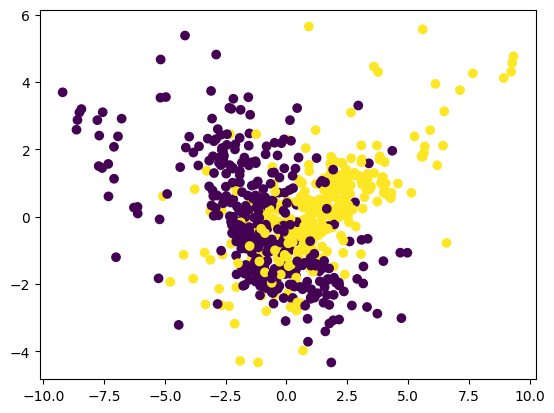

In [56]:
fig = plt.figure()
ax = plt.axes()
#ax.scatter(X_train[:,9], X_train[:,15], X_train[:,17], c=y_train)
ax.scatter(pca_arr[:,0], pca_arr[:,1], c=label_arr)
#ax.scatter(X_test[:,9], X_test[:,15], X_test[:,17], c=np.round(y_pred+2))
plt.show()

In [57]:
clf = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(solver='liblinear'))
cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())

print(cv, np.mean(cv))

[0.73913043 0.71014493 0.77536232 0.69565217 0.62318841] 0.7086956521739131


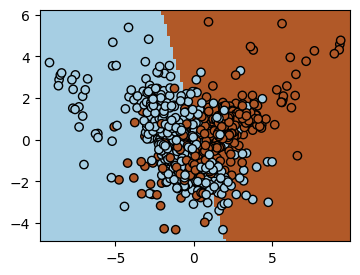

In [58]:
from sklearn.inspection import DecisionBoundaryDisplay

lr = LogisticRegression()
lr.fit(pca_arr, label_arr)
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    lr,
    pca_arr,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    eps=0.5,
)

# Plot also the training points
plt.scatter(pca_arr[:, 0], pca_arr[:, 1], c=label_arr, edgecolors="k", cmap=plt.cm.Paired)
plt.show()

### With PCA - 50 features

In [59]:
pca = PCA(n_components=2)
ss = StandardScaler()
pca.fit(ss.fit_transform(filtered_df_50_arr))

PCA(n_components=2)

In [60]:
pca_arr50 = pca.transform(ss.fit_transform(filtered_df_50_arr))

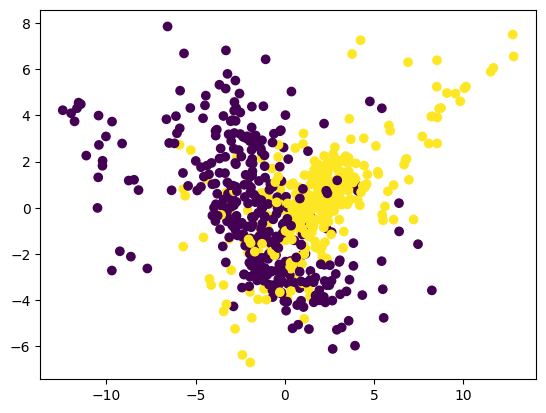

In [61]:
fig = plt.figure()
ax = plt.axes()
#ax.scatter(X_train[:,9], X_train[:,15], X_train[:,17], c=y_train)
ax.scatter(pca_arr50[:,0], pca_arr50[:,1], c=label_arr)
#ax.scatter(X_test[:,9], X_test[:,15], X_test[:,17], c=np.round(y_pred+2))
plt.show()

In [62]:
clf = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(solver='liblinear'))
cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())

print(cv, np.mean(cv))

[0.6884058  0.76086957 0.78985507 0.73913043 0.63768116] 0.7231884057971014


In [63]:
# TODO: Remove outliers before the clustering (after PCA) (ignoring the classes of the data points)
# PCA but use 50 feature dataset

In [64]:
def reject_outliers(data, target, m=2):
    mask = np.all(abs(data - np.mean(data, axis=0)) < 2 * np.std(data, axis=0), axis=1)
    return data[mask].reshape(-1,3), target[mask]

In [65]:
reject_outliers(pca_arr50)

TypeError: reject_outliers() missing 1 required positional argument: 'target'